# Zomato Restaurant

# Project Description
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.



# Analyzing the social media discussion around a certain topic

Evaluating survey responses

Determining whether product reviews are positive or negative

Sentiment analysis is not perfect, and as with any automatic analysis of language, you will have errors in your results. It also cannot tell you why a writer is feeling a certain way. However, it can be useful to quickly summarize some qualities of text, especially if you have so much text that a human reader cannot analyze all of it.

For this project,the goal is to analyzing the Zomato Bangalore dataset is to understand people’s choice of cuisine,dining type,preference for location according to price etc.

In this notebook, we will go through:

Preprocessing - Load the dataset, retrieve the reviews (aka documents) and scores, encode the target (scores) and split into a training and test set.
Training Model - We will train a simple LSTM model that will predict the rating based solely on the review comments.
Evaluation - We will plot the loss and accuracy progression through epochs, and display the classification results as a table.

# AIM:
In this dataset predict 2 things –
1) Average Cost for two
2) Price range
 

# Importing essential libraries

In [1]:
!pip install xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder

# Reading csv file

In [2]:
zomato_d1 = pd.read_excel(r'C:\Users\Lenovo\Downloads\Country-Code.xlsx')

In [3]:
zomato_d1

Country Code         Country
0              1           India
1             14       Australia
2             30          Brazil
3             37          Canada
4             94       Indonesia
5            148     New Zealand
6            162     Phillipines
7            166           Qatar
8            184       Singapore
9            189    South Africa
10           191       Sri Lanka
11           208          Turkey
12           214             UAE
13           215  United Kingdom
14           216   United States

In [4]:
zomato_d2 = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='ISO-8859-1')

In [5]:
zomato_data= pd.merge (zomato_d1,zomato_d2) 

In [6]:
zomato_data.head(10).T

0  \
Country Code                                                          1   
Country                                                           India   
Restaurant ID                                                   3400025   
Restaurant Name                                              Jahanpanah   
City                                                               Agra   
Address               E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   
Locality                                                     Agra Cantt   
Locality Verbose                                       Agra Cantt, Agra   
Longitude                                                     78.011544   
Latitude                                                      27.161661   
Cuisines                                          North Indian, Mughlai   
Average Cost for two                                                850   
Currency                                             Indian Rupees(Rs.)   
Has Table booking                                                    No   
Has Online delivery                                                  No   
Is delivering now                                                    No   
Switch to order menu                                                 No   
Price range                                                           3   
Aggregate rating                                                    3.9   
Rating color                                                     Yellow   
Rating text                                                        Good   
Votes                                                               140   

                                                                      1  \
Country Code                                                          1   
Country                                                           India   
Restaurant ID                                                   3400341   
Restaurant Name                                     Rangrezz Restaurant   
City                                                               Agra   
Address               E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   
Locality                                                     Agra Cantt   
Locality Verbose                                       Agra Cantt, Agra   
Longitude                                                           0.0   
Latitude                                                            0.0   
Cuisines                                          North Indian, Mughlai   
Average Cost for two                                                700   
Currency                                             Indian Rupees(Rs.)   
Has Table booking                                                    No   
Has Online delivery                                                  No   
Is delivering now                                                    No   
Switch to order menu                                                 No   
Price range                                                           2   
Aggregate rating                                                    3.5   
Rating color                                                     Yellow   
Rating text                                                        Good   
Votes                                                                71   

                                                                2  \
Country Code                                                    1   
Country                                                     India   
Restaurant ID                                             3400005   
Restaurant Name                           Time2Eat - Mama Chicken   
City                                                         Agra   
Address               Main Market, Sadar Bazaar, Agra Cantt, Agra   
Locality                                               Agra Cantt   
Locality Verbose                                 Agra Cantt, Agra 

In [7]:
zomato_data.shape

(9551, 22)

# Gives informaton of the dataset it's type etc

zomato_data.info()

In [8]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country Code          9551 non-null   int64  
 1   Country               9551 non-null   object 
 2   Restaurant ID         9551 non-null   int64  
 3   Restaurant Name       9551 non-null   object 
 4   City                  9551 non-null   object 
 5   Address               9551 non-null   object 
 6   Locality              9551 non-null   object 
 7   Locality Verbose      9551 non-null   object 
 8   Longitude             9551 non-null   float64
 9   Latitude              9551 non-null   float64
 10  Cuisines              9542 non-null   object 
 11  Average Cost for two  9551 non-null   int64  
 12  Currency              9551 non-null   object 
 13  Has Table booking     9551 non-null   object 
 14  Has Online delivery   9551 non-null   object 
 15  Is delivering now    

Note: There are 3 data types in the data

object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status

int64: It represents the integer variables. ApplicantIncome is of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History

Why Data Types are important?

Datatypes are an important concept because statistical methods can only be used with certain data types. You have to analyze continuous data differently than categorical data otherwise it would result in a wrong analysis. Therefore knowing the types of data you are dealing with, enables you to choose the correct method of anal

# Checking null values

In [9]:
zomato_data.isna().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Missing value check

In [10]:
zomato_data= zomato_data.replace('?',np.NaN)

In [11]:
zomato_data.isna().sum()

Country Code            0
Country                 0
Restaurant ID           0
Restaurant Name         0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
zomato_data.describe(include=['object'])

Country  Restaurant Name       City           Address         Locality  \
count     9551             9551       9551              9551             9551   
unique      15             7446        141              8918             1208   
top      India  Cafe Coffee Day  New Delhi  Sector 41, Noida  Connaught Place   
freq      8652               83       5473                11              122   

                  Locality Verbose      Cuisines            Currency  \
count                         9551          9542                9551   
unique                        1265          1825                  12   
top     Connaught Place, New Delhi  North Indian  Indian Rupees(Rs.)   
freq                           122           936                8652   

       Has Table booking Has Online delivery Is delivering now  \
count               9551                9551              9551   
unique                 2                   2                 2   
top                   No                  No                No   
freq                8393                7100              9517   

       Switch to order menu Rating color Rating text  
count                  9551         9551        9551  
unique                    1            6           6  
top                      No       Orange     Average  
freq                   9551         3737        3737

In [13]:
zomato_data = zomato_data.drop(['Restaurant ID','Longitude','Latitude','Address'], axis = 1)

In [14]:
zomato_data.head(10).T

0                      1  \
Country Code                              1                      1   
Country                               India                  India   
Restaurant Name                  Jahanpanah    Rangrezz Restaurant   
City                                   Agra                   Agra   
Locality                         Agra Cantt             Agra Cantt   
Locality Verbose           Agra Cantt, Agra       Agra Cantt, Agra   
Cuisines              North Indian, Mughlai  North Indian, Mughlai   
Average Cost for two                    850                    700   
Currency                 Indian Rupees(Rs.)     Indian Rupees(Rs.)   
Has Table booking                        No                     No   
Has Online delivery                      No                     No   
Is delivering now                        No                     No   
Switch to order menu                     No                     No   
Price range                               3                      2   
Aggregate rating                        3.9                    3.5   
Rating color                         Yellow                 Yellow   
Rating text                            Good                   Good   
Votes                                   140                     71   

                                            2  \
Country Code                                1   
Country                                 India   
Restaurant Name       Time2Eat - Mama Chicken   
City                                     Agra   
Locality                           Agra Cantt   
Locality Verbose             Agra Cantt, Agra   
Cuisines                         North Indian   
Average Cost for two                      500   
Currency                   Indian Rupees(Rs.)   
Has Table booking                          No   
Has Online delivery                        No   
Is delivering now                          No   
Switch to order menu                       No   
Price range                                 2   
Aggregate rating                          3.6   
Rating color                           Yellow   
Rating text                              Good   
Votes                                      94   

                                                          3  \
Country Code                                              1   
Country                                               India   
Restaurant Name       Chokho Jeeman Marwari Jain Bhojanalya   
City                                                   Agra   
Locality                                        Civil Lines   
Locality Verbose                          Civil Lines, Agra   
Cuisines                                         Rajasthani   
Average Cost for two                                    400   
Currency                                 Indian Rupees(Rs.)   
Has Table booking                                        No   
Has Online delivery                                      No   
Is delivering now                                        No   
Switch to order menu                                     No   
Price range                                               2   
Aggregate rating                                        4.0   
Rating color                                          Green   
Rating text                                       Very Good   
Votes                                                    87   

                                                   4  \
Country Code                                       1   
Country                                        India   
Restaurant Name                       Pinch Of Spice   
City                                            Agra   
Locality                                 Civil Lines   
Locality Verbose                   Civil Lines, Agra   
Cuisines              North Indian, Chinese, Mughlai   
Average Cost for two                            1000   
Currency                          Indian Rupees(Rs.)   
Has Table booking    

# Encoding categorical variable

In [15]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in zomato_data:
    zomato_data[i] = label.fit_transform(zomato_data[i])
zomato_data.head().T

0     1     2     3     4
Country Code             0     0     0     0     0
Country                  3     3     3     3     3
Restaurant Name       3201  5261  6919  1637  4922
City                     1     1     1     1     1
Locality                17    17    17   204   204
Locality Verbose        17    17    17   205   205
Cuisines              1514  1514  1306  1645  1373
Average Cost for two    67    63    55    50    71
Currency                 4     4     4     4     4
Has Table booking        0     0     0     0     0
Has Online delivery      0     0     0     0     0
Is delivering now        0     0     0     0     0
Switch to order menu     0     0     0     0     0
Price range              2     1     1     1     2
Aggregate rating        22    18    19    23    25
Rating color             5     5     5     1     1
Rating text              2     2     2     5     5
Votes                  140    71    94    87   177

# pairplot

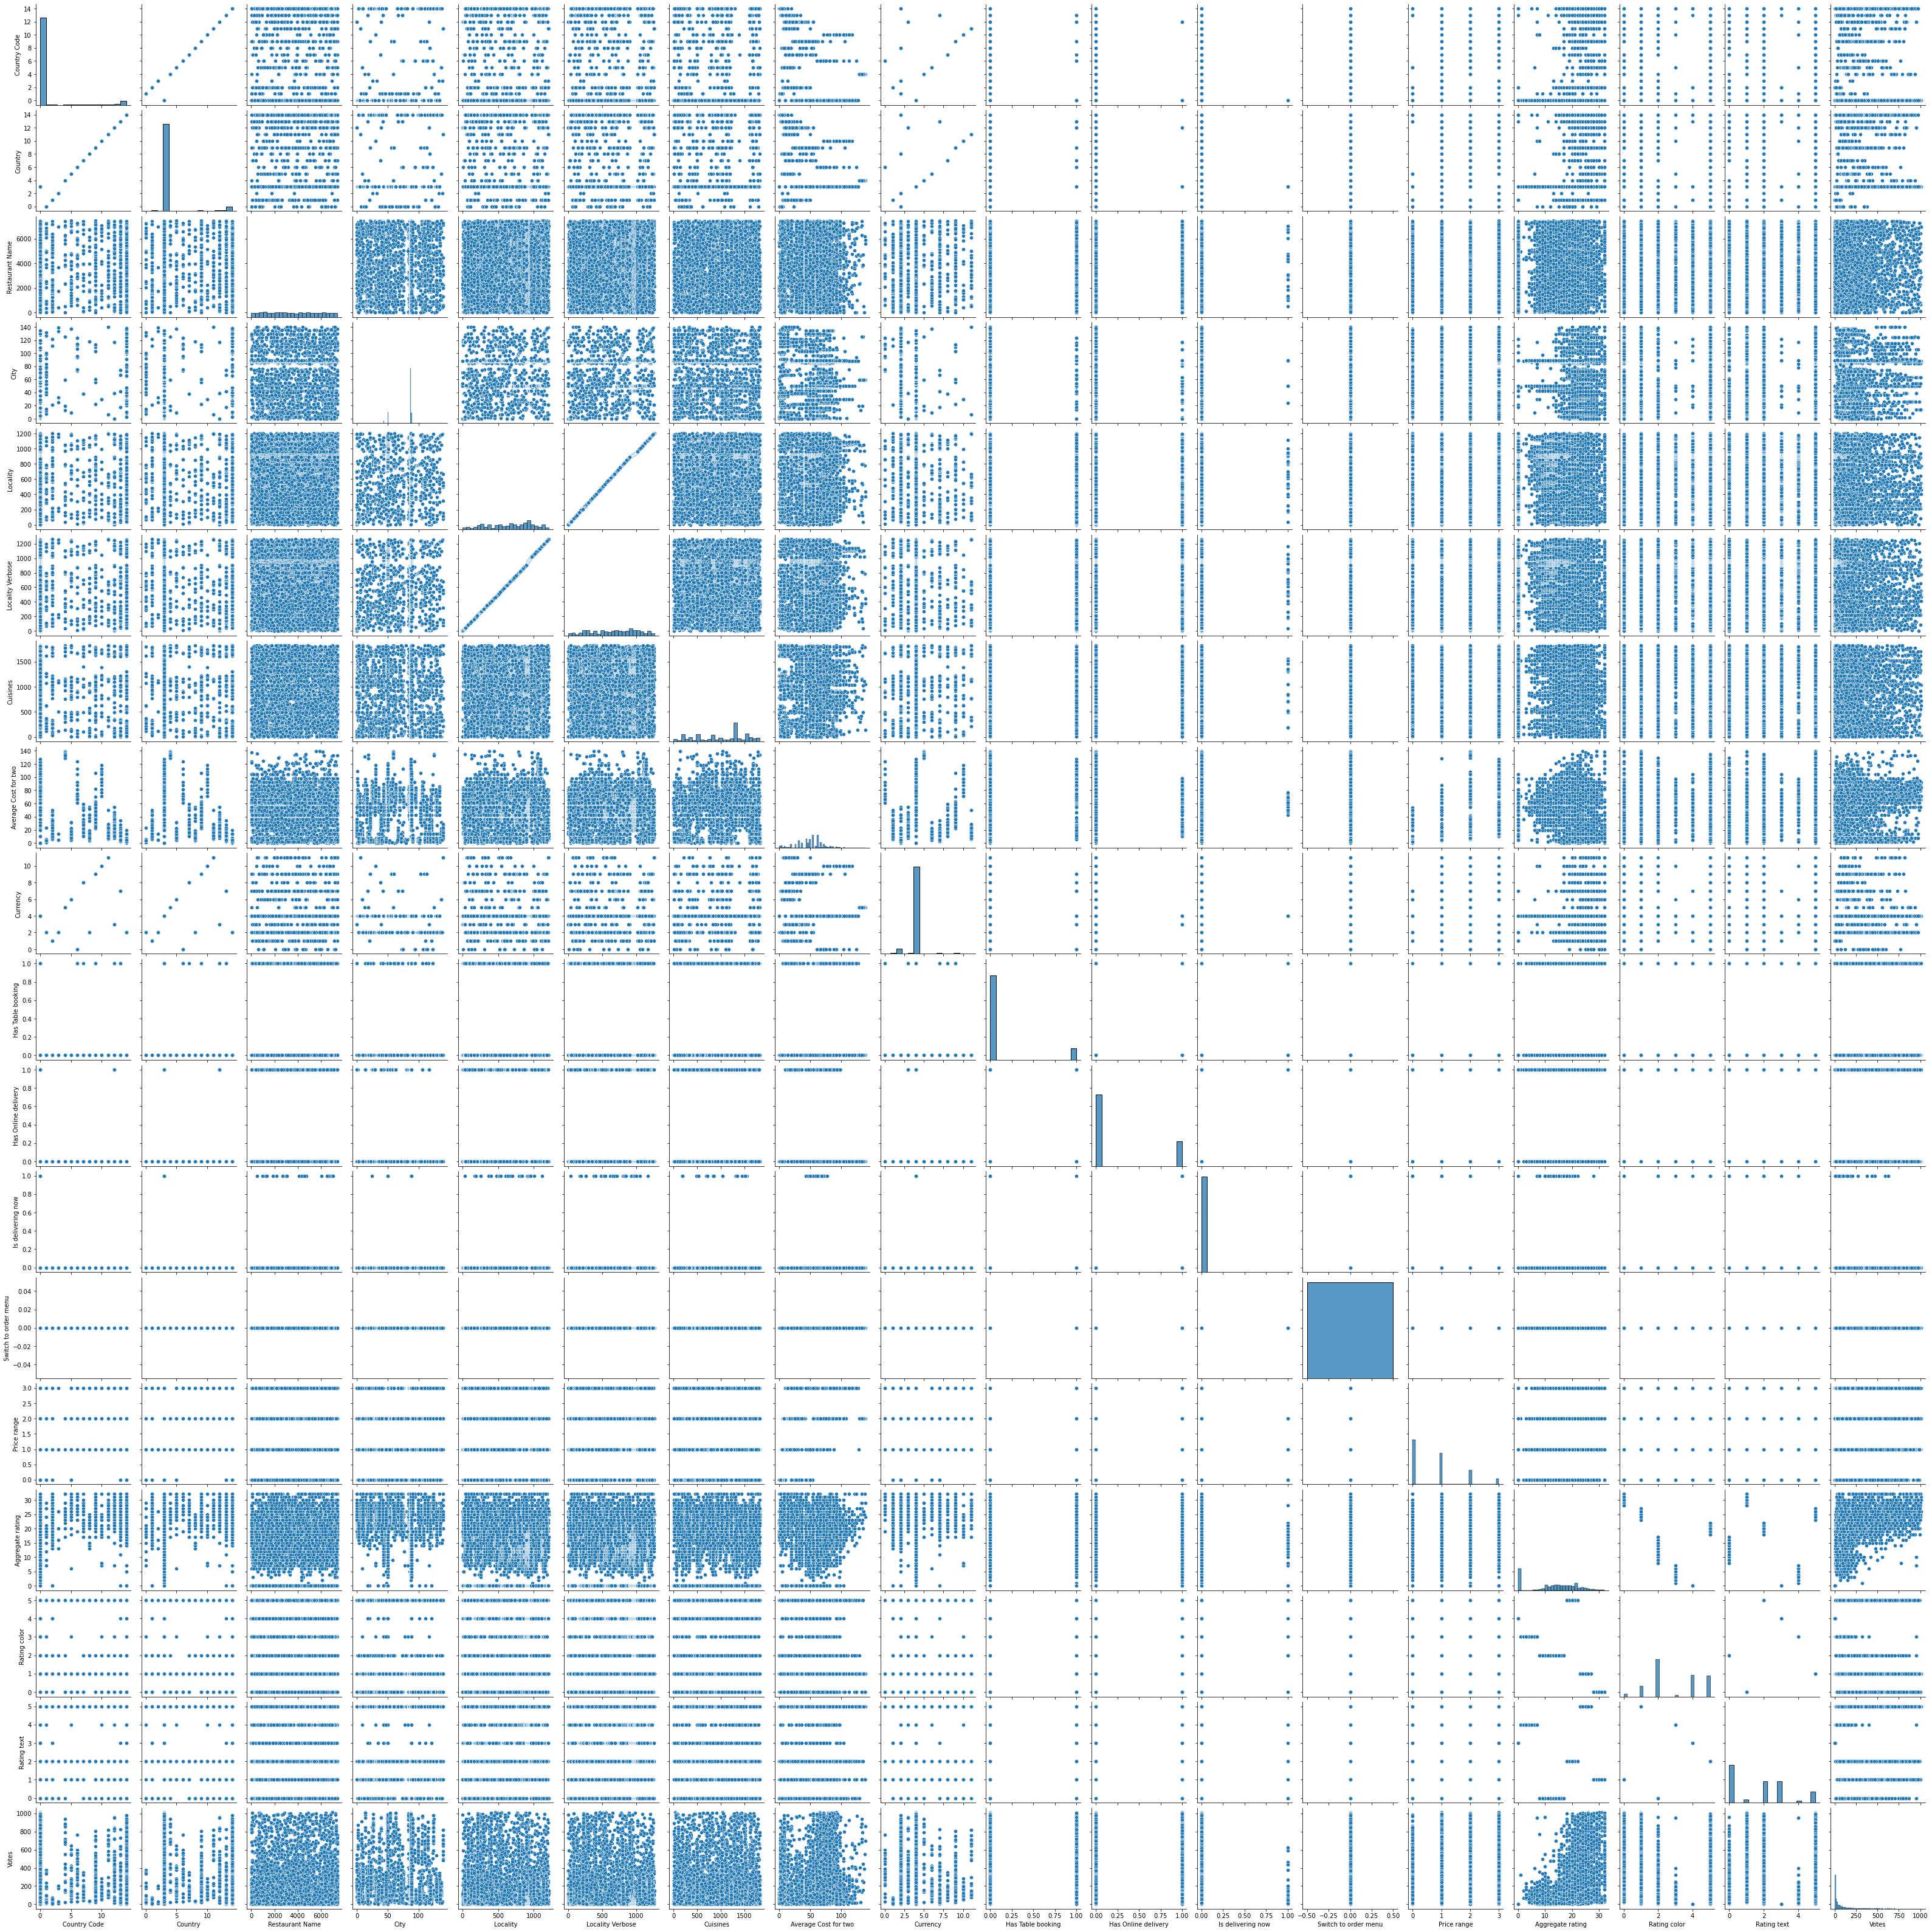

In [16]:
sns.pairplot(zomato_data)

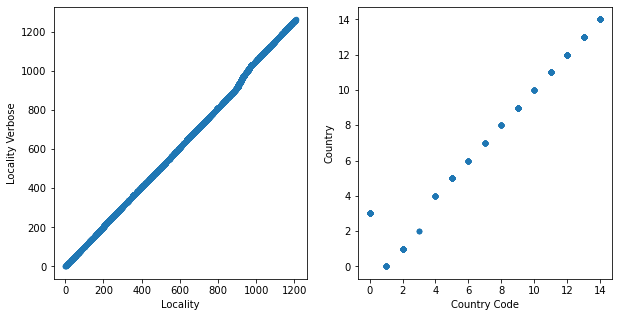

In [17]:
fig ,axs =plt.subplots(1,2)
zomato_data.plot(kind='scatter',x='Locality',y='Locality Verbose', ax=axs[0] ,figsize=(12,8))
zomato_data.plot(kind='scatter',x='Country Code',y='Country', ax=axs[1] ,figsize=(10,5))
fig.savefig('testdata.jpg')

In [18]:
zomato_data = zomato_data.drop(['Locality','Country Code'], axis = 1)

In [19]:
zomato_data = zomato_data.drop(['Switch to order menu'], axis = 1)

# Checking Correlation
Checking Correlation Now lets look at the correlation between all the numerical variables. We can use the corr() to compute pairwise correlation of columns, excluding NA/null values using pearson correlation coefficient. Then we will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

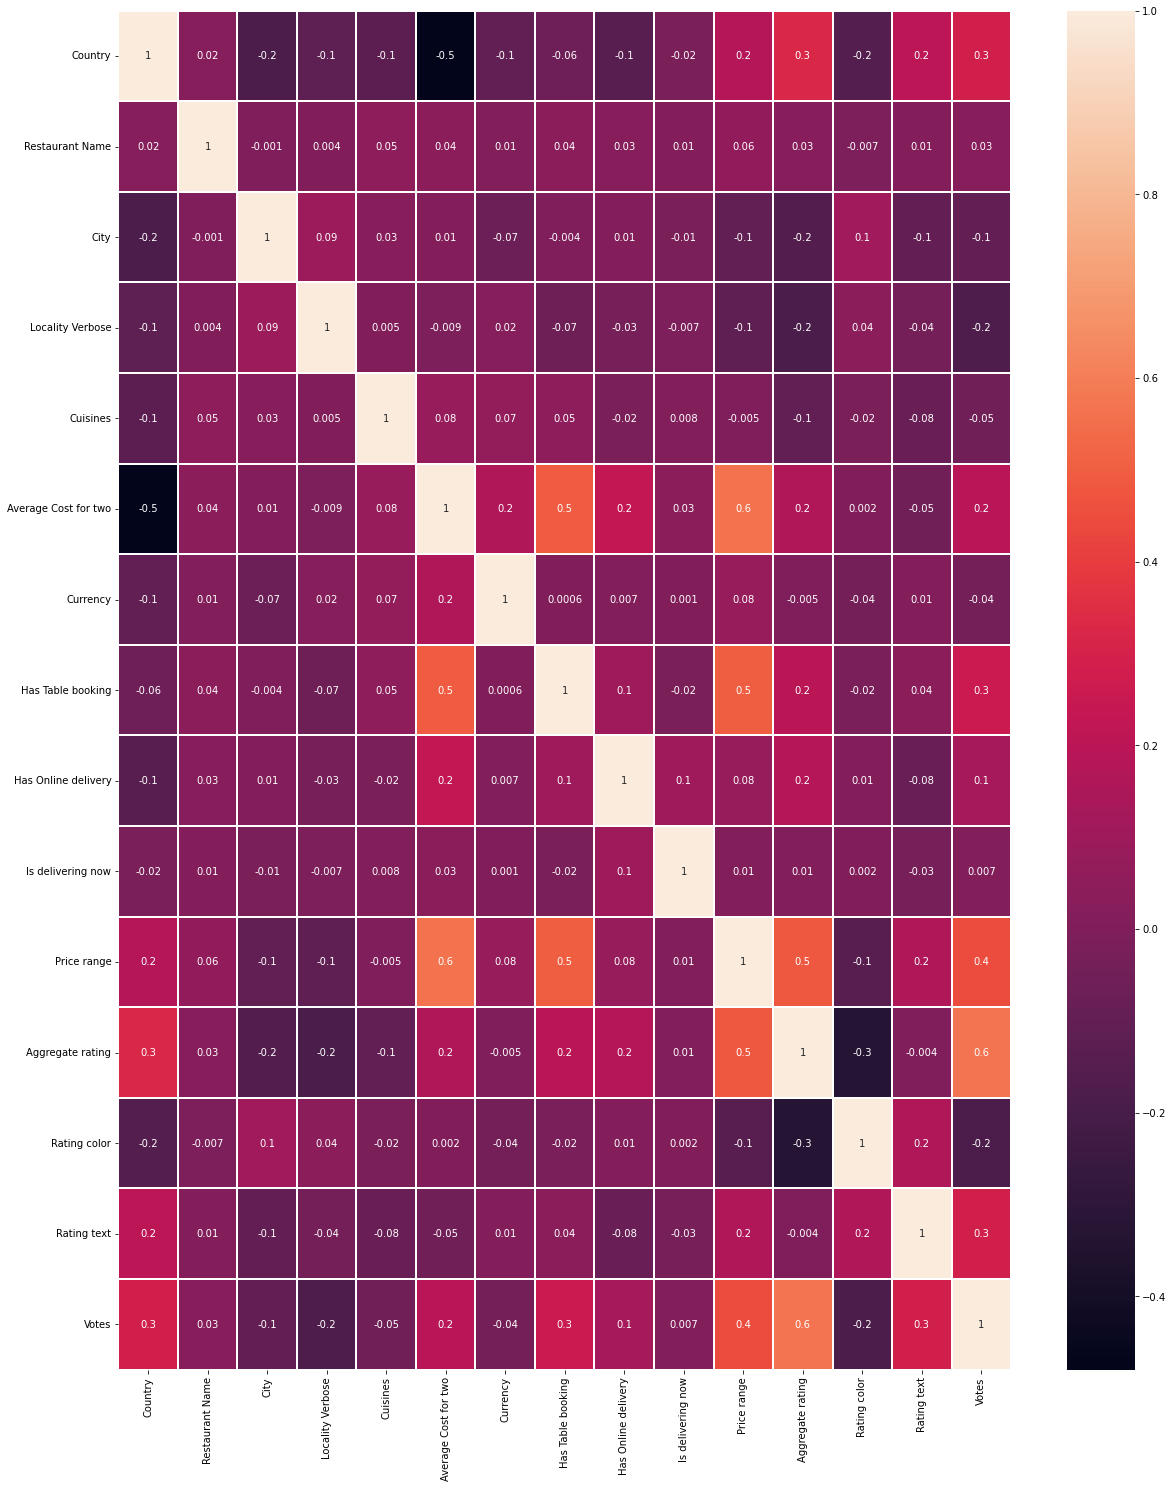

In [20]:
plt.figure(figsize=(20,25))
corr = zomato_data.corr()
sns.heatmap(data=corr, annot=True, fmt='.1g' ,linewidth= 2)
plt.show()

# Checking outliers

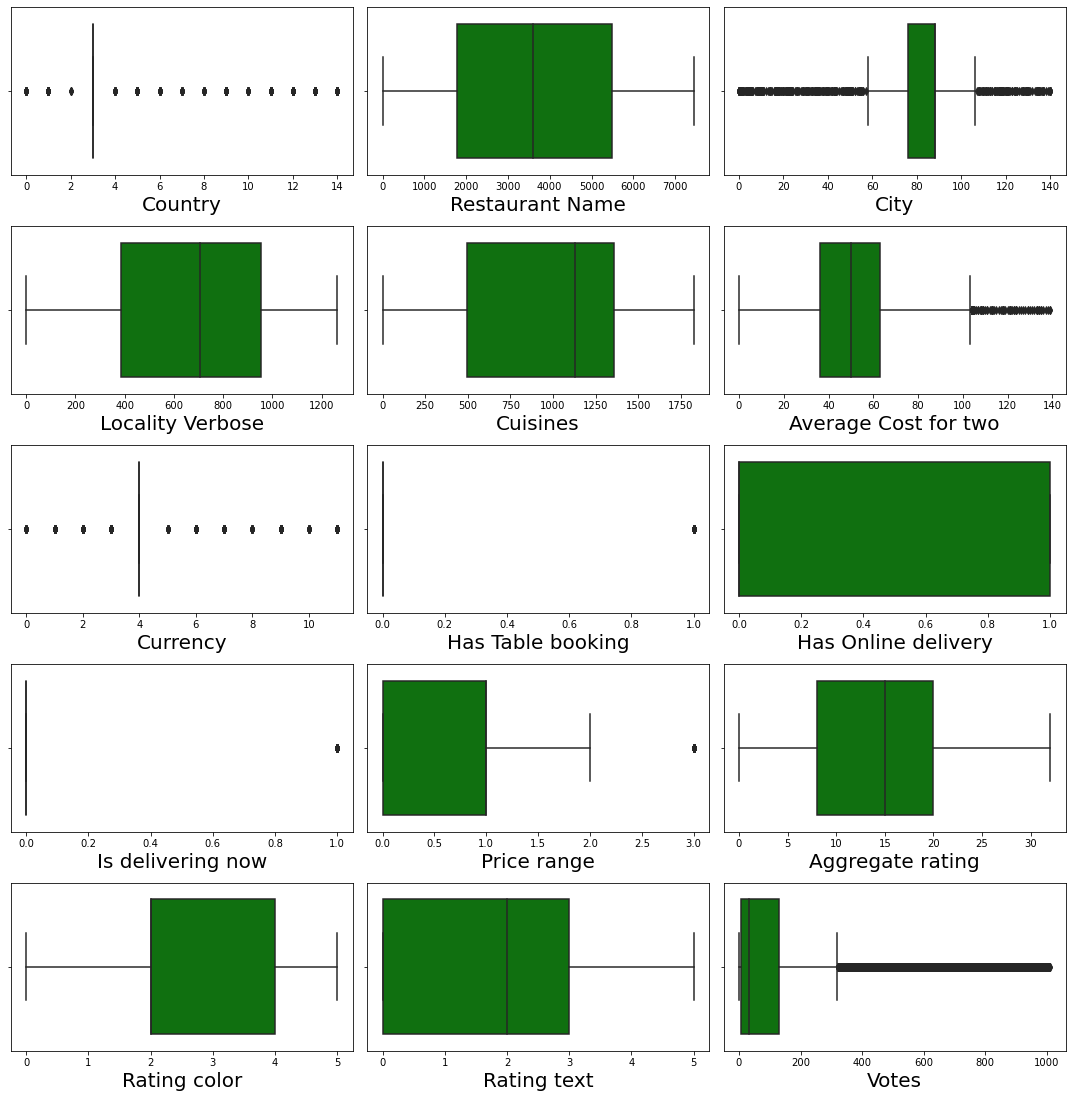

In [22]:
plt.figure(figsize=(15,30),facecolor='white')
plotnumber=1

for column in zomato_data:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(zomato_data[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Checking Skewness of features

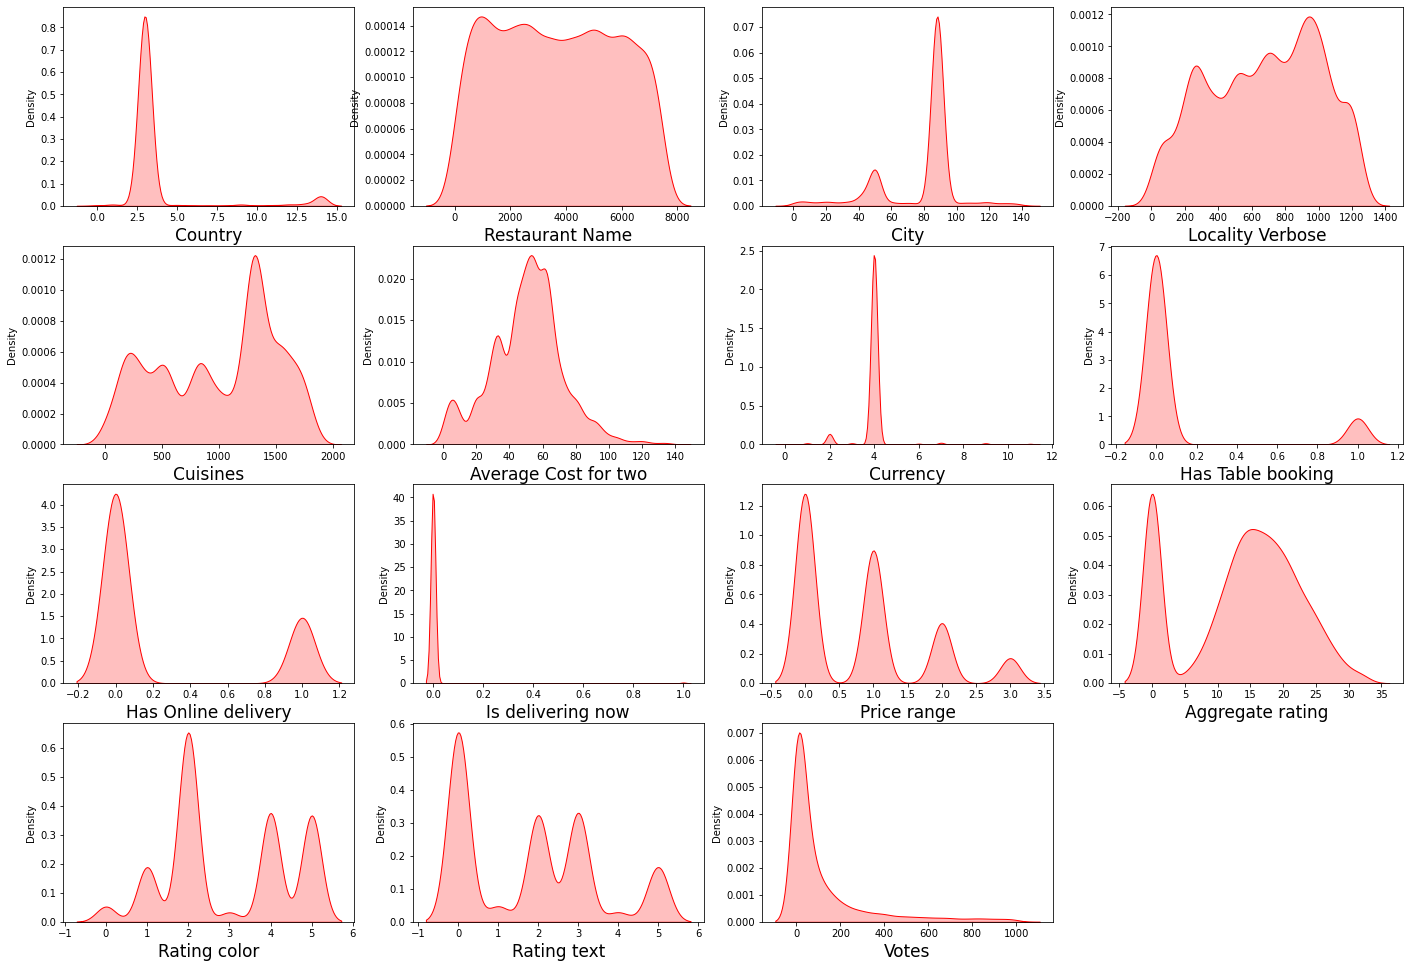

In [23]:
plt.figure(figsize=(24,30), facecolor='white')
plotnumber =1
for column in zomato_data:
    if plotnumber<=28:
        ax= plt.subplot(7,4,plotnumber)
        sns.distplot(zomato_data[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=17)
    plotnumber+=1
plt.show()

In [24]:
zomato_data.skew()

Country                  3.312721
Restaurant Name          0.044637
City                    -1.193777
Locality Verbose        -0.183064
Cuisines                -0.305484
Average Cost for two     0.089636
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.296072
Rating color             0.046009
Rating text              0.431408
Votes                    2.445367
dtype: float64

In [25]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['Country','City','Is delivering now','Votes','Currency','Has Table booking','Has Online delivery']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
zomato_data[skew] = scaler.fit_transform(zomato_data[skew].values)

In [26]:
zomato_data.skew()

Country                 -1.341627
Restaurant Name          0.044637
City                    -0.203048
Locality Verbose        -0.183064
Cuisines                -0.305484
Average Cost for two     0.089636
Currency                 0.448602
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.296072
Rating color             0.046009
Rating text              0.431408
Votes                   -0.026978
dtype: float64

In [27]:
zomato_data.corr()

Country  Restaurant Name      City  Locality Verbose  \
Country               1.000000         0.015455 -0.074736         -0.078901   
Restaurant Name       0.015455         1.000000  0.000972          0.004281   
City                 -0.074736         0.000972  1.000000          0.074691   
Locality Verbose     -0.078901         0.004281  0.074691          1.000000   
Cuisines             -0.071660         0.051496  0.015100          0.005483   
Average Cost for two -0.298250         0.039748 -0.038937         -0.009413   
Currency              0.020363         0.005928 -0.077489          0.040254   
Has Table booking    -0.031743         0.041173 -0.020934         -0.065132   
Has Online delivery  -0.091869         0.028082 -0.014851         -0.031766   
Is delivering now    -0.011353         0.011984 -0.017968         -0.007353   
Price range           0.128665         0.061275 -0.058484         -0.112313   
Aggregate rating      0.238837         0.028207 -0.098134         -0.189915   
Rating color         -0.130937        -0.007311  0.086019          0.037104   
Rating text           0.155561         0.012131 -0.062609         -0.035430   
Votes                 0.247076         0.039602 -0.079332         -0.203572   

                      Cuisines  Average Cost for two  Currency  \
Country              -0.071660             -0.298250  0.020363   
Restaurant Name       0.051496              0.039748  0.005928   
City                  0.015100             -0.038937 -0.077489   
Locality Verbose      0.005483             -0.009413  0.040254   
Cuisines              1.000000              0.077826  0.084226   
Average Cost for two  0.077826              1.000000  0.211196   
Currency              0.084226              0.211196  1.000000   
Has Table booking     0.050232              0.493727  0.006843   
Has Online delivery  -0.017180              0.230209  0.034248   
Is delivering now     0.007708              0.030419  0.004303   
Price range          -0.005489              0.562196  0.024466   
Aggregate rating     -0.106243              0.166273 -0.061959   
Rating color         -0.016180              0.001503 -0.005784   
Rating text          -0.080025             -0.052723 -0.018952   
Votes                -0.065993              0.268072 -0.051504   

                      Has Table booking  Has Online delivery  \
Country                       -0.031743            -0.091869   
Restaurant Name                0.041173             0.028082   
City                          -0.020934            -0.014851   
Locality Verbose              -0.065132            -0.031766   
Cuisines                       0.050232            -0.017180   
Average Cost for two           0.493727             0.230209   
Currency                       0.006843             0.034248   
Has Table booking              1.000000             0.101224   
Has Online delivery            0.101224             1.000000   
Is delivering now             -0.016816             0.101730   
Price range                    0.501925             0.077918   
Aggregate rating               0.196435             0.179281   
Rating color                  -0.021365             0.011477   
Rating text                    0.044043            -0.080937   
Votes                          0.277559             0.286294   

                      Is delivering now  Price range  Aggregate rating  \
Country                       -0.011353     0.128665          0.238837   
Restaurant Name                0.011984     0.061275          0.028207   
City                          -0.017968    -0.058484         -0.098134   
Locality Verbose              -0.007353    -0.112313         -0.189915   
Cuisines                       0.007708    -0.005489         -0.106243   
Average Cost for two           0.030419     0.562196          0.166273   
Currency                       0.004303     0.024466         -0.061959   
Has Table booking             -0.016816     0.501925          0.196435   
Has Online

In [28]:
X = zomato_data.drop(columns = ['Average Cost for two'],axis=1)
Y = zomato_data['Average Cost for two']

# StandardScaler

In [29]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Inflation factor

In [30]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values             Features
0     1.148318              Country
1     1.007713      Restaurant Name
2     1.031739                 City
3     1.051626     Locality Verbose
4     1.040843             Cuisines
5     1.028609             Currency
6     1.386715    Has Table booking
7     1.179569  Has Online delivery
8     1.013144    Is delivering now
9     1.823531          Price range
10    4.314178     Aggregate rating
11    1.192332         Rating color
12    1.130855          Rating text
13    4.610888                Votes

# Split , Train , Test

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (6685, 14)
Training target size: (6685,)
Test feature size: (2866, 14)
Test target size: (2866,)


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.1113049546406141 on Random_state 94


# General function for train ,test,and predict for zomato service

In [52]:
def model_val(model,X,Y):
    X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=94)
    model.fit( X_train,Y_train)
    y_pred=model.predict(X_test)
    print("Accuracy is ", model.score(X_test,Y_test)*100)
    score= cross_val_score(model,X,Y,cv=5) 
    print("Cross validation score is ", np.mean(score)*100)

# Logistics Regression Model

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model= LogisticRegression()
model_val(model,X,Y)

Accuracy is  11.13049546406141
Cross validation score is  9.569727206226833


# DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model_val(model,X,Y)
#classification_report(Y_test, y_pred)

Accuracy is  28.19260293091417
Cross validation score is  27.05519710904902


# Decision Tree
Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

# SVC

In [55]:
from sklearn.svm import SVC
model= SVC()
model_val(model,X,Y)

Accuracy is  10.4675505931612
Cross validation score is  10.009517782143066


# KNeighborsClassifier

In [56]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model_val(model,X,Y)

Accuracy is  14.166085136078157
Cross validation score is  12.407083816208724


# SGDClassifier

In [57]:
from sklearn.linear_model import SGDClassifier
model= SGDClassifier()
model_val(model,X,Y)

Accuracy is  3.907885554780181
Cross validation score is  5.130095533984838


# AdaBoostClassifier

In [58]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model_val(model,X,Y)

Accuracy is  20.795533845080254
Cross validation score is  17.903764647220143


# ExtraTreesClassifier

In [59]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model_val(model,X,Y)

Accuracy is  32.10048848569434
Cross validation score is  27.47407815321054


# GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model_val(model,X,Y)

# RandomForestClassifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model_val(model,X,Y)

Accuracy is  33.53105373342638
Cross validation score is  29.923972811033394


# Random Forest
RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model. For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model. Final prediction can be a function of all the predictions made by the individual learners. In case of regression problem, the final prediction can be mean of all the predictions

# Hyper Parameter Tuning : GridSearchCV

In [62]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,7,10],
              'max_depth' : [10,20],
              'n_estimators' : [100,200,300]
             }

In [63]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.336 total time=   1.6s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.328 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.335 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.342 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.335 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.343 total time=   2.2s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.331 total time=   2.0s
[CV 3/

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=5)

In [64]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_split': 7,
 'n_estimators': 300}

# Final Model for  Zomato Average cost for two

In [65]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 300, max_depth=20 ,
                                 min_samples_split= 7, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.3363572923935799


# Save model

In [66]:
import joblib
joblib.dump(Final_mod,'zomato_avgcost_Status.pkl')

['zomato_avgcost_Status.pkl']

# Split , Train , Test

In [67]:
X = zomato_data.drop(columns = ['Price range'],axis=1)
Y = zomato_data['Price range']

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature size:',X_train.shape)
print('Training target size:',Y_train.shape)
print('Test feature size:',X_test.shape)
print('Test target size:',Y_test.shape)

Training feature size: (6685, 14)
Training target size: (6685,)
Test feature size: (2866, 14)
Test target size: (2866,)


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.5704815073272854 on Random_state 171


In [70]:
def model_val(model,X,Y):
    X_train,X_test,Y_train,Y_test =  train_test_split(X,Y,test_size=.30,random_state=171)
    model.fit( X_train,Y_train)
    y_pred=model.predict(X_test)
    print("Accuracy is ", model.score(X_test,Y_test)*100)
    score= cross_val_score(model,X,Y,cv=5) 
    print("Cross validation score is ", np.mean(score)*100)

# RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model_val(model,X,Y)

Accuracy is  96.2665736217725
Cross validation score is  88.43041525913627


# GradientBoostingClassifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model_val(model,X,Y)

Accuracy is  97.3831123517097
Cross validation score is  86.88141128380471


# ExtraTreesClassifier

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
model= ExtraTreesClassifier()
model_val(model,X,Y)

Accuracy is  93.05652477320308
Cross validation score is  80.9974164454344


# AdaBoostClassifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model_val(model,X,Y)

Accuracy is  81.64689462665736
Cross validation score is  81.63537634143468


# SGDClassifier

In [75]:
from sklearn.linear_model import SGDClassifier
model= SGDClassifier()
model_val(model,X,Y)

Accuracy is  50.73272854152129
Cross validation score is  44.109933945386445


# KNeighborsClassifier

In [76]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier()
model_val(model,X,Y)

Accuracy is  53.10537334263782
Cross validation score is  47.24129522932814


# SVC

In [77]:
from sklearn.svm import SVC
model= SVC()
model_val(model,X,Y)

Accuracy is  47.13886950453594
Cross validation score is  46.52916019408166


# DecisionTreeClassifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model_val(model,X,Y)
#classification_report(Y_test, y_pred)

Accuracy is  96.89462665736218
Cross validation score is  81.0094986041134


# LogisticRegression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
model= LogisticRegression()
model_val(model,X,Y)

Accuracy is  57.048150732728544
Cross validation score is  51.481842515499956


# Hyper Parameter Tuning : GridSearchCV

In [80]:
from sklearn.model_selection import GridSearchCV
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,7,10],
              'max_depth' : [10,20],
              'n_estimators' : [100,200,300]
             }

In [81]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.957 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.961 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.960 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.948 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=0.961 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.956 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=200;, score=0.960 total time=   0.8s
[CV 3/

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 7, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=5)

In [82]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_split': 5,
 'n_estimators': 300}

# Final Model for  zomato  price range

In [83]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 300, max_depth=20 ,
                                 min_samples_split= 5, max_features= 'auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9658060013956734


# Save model

In [84]:
import joblib
joblib.dump(Final_mod,'zomato_price_range_Status.pkl')

['zomato_price_range_Status.pkl']

# Conclusion

In [ ]:
After the Above Analysis it is found that using same data for both analysis i.e. of Price Range and Average cost for two in one condition accuracy is good while in second condition with same analysis accuracy obtained is best.
more accuracy for 1st case may be acheived doing furthur analysis and collecting more data